In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Line Graph

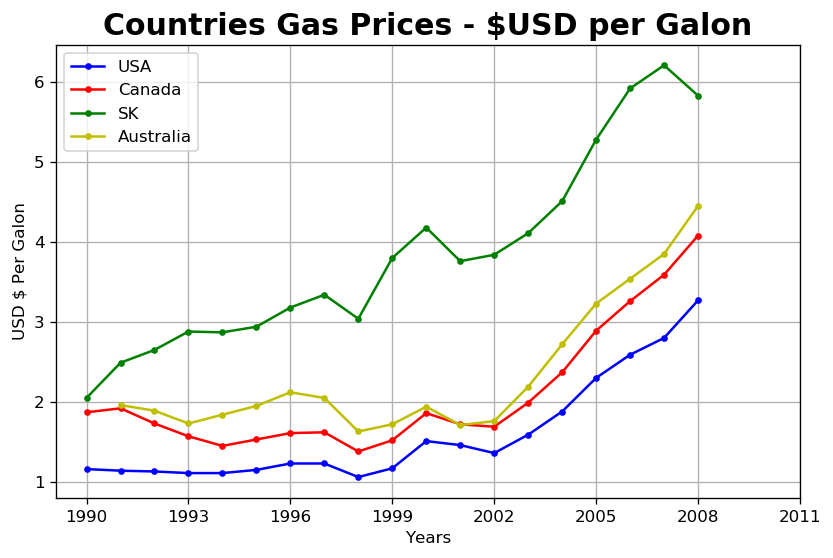

In [73]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5), dpi=120)

plt.title('Countries Gas Prices - $USD per Galon', fontdict={'fontweight': 'bold', 'fontsize': 18})

plt.plot(gas.Year, gas.USA, 'b.-', label='USA')
plt.plot(gas.Year, gas.Canada, 'r.-', label="Canada")
plt.plot(gas.Year, gas['South Korea'], 'g.-', label="SK")
plt.plot(gas.Year, gas.Australia, 'y.-', label="Australia")
# Labels inherit from CSV headers if no labels specified here.

# Another way to plot many values in DF
# for country in gas:
#     if country != 'Year':
#         plt.plot(gas.Year, gas[country], marker='.', label=country)

plt.xticks(gas.Year[::3].to_list()+[2011])
# List of years, adding 2011 to the end manually.

plt.xlabel('Years')

plt.ylabel('USD $ Per Galon')

plt.legend()
plt.savefig('gas_price_figure.png', dpi=300)
plt.grid()
plt.show()